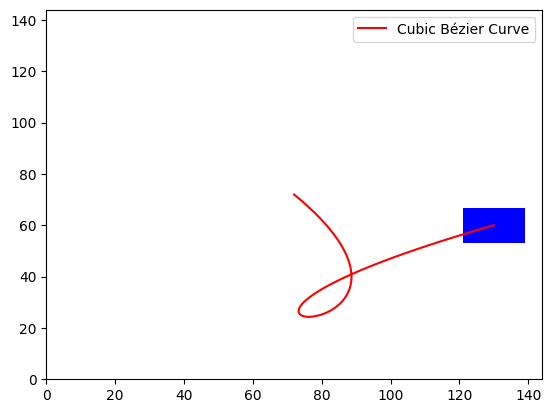

: 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle
from matplotlib.transforms import Affine2D
from IPython.display import HTML

# Create the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(0, 144)
ax.set_ylim(0, 144)

# Define Bézier control points
P0 = np.array([72, 72])  # Start point
P1 = np.array([130, 8])  # Control point 1
P2 = np.array([8, 13])  # Control point 2
P3 = np.array([130, 60])  # End point

# Cubic Bézier function
def bezier(t, P0, P1, P2, P3):
    return (
        (1 - t) ** 3 * P0
        + 3 * (1 - t) ** 2 * t * P1
        + 3 * (1 - t) * t ** 2 * P2
        + t ** 3 * P3
    )

# Generate Bézier curve points
t_values = np.linspace(0, 1, 100)
curve = np.array([bezier(t, P0, P1, P2, P3) for t in t_values])

# Plot the Bézier curve
ax.plot(curve[:, 0], curve[:, 1], 'r-', label='Cubic Bézier Curve')
ax.legend()

# Add a rectangle (box)
box_width = 13.5  # Box width & 
box_height = 18   #height
box = Rectangle((-box_height / 2, -box_width / 2), box_height, box_width, fc='blue')
ax.add_patch(box)

# Update function for animation
def update(frame):
    # Get the position on the curve
    pos = bezier(frame, P0, P1, P2, P3)
    x, y = pos

    # Calculate the tangent to the curve for rotation
    if frame < 0.99:  # Prevent index overflow
        next_pos = bezier(frame + 0.01, P0, P1, P2, P3)
        dx, dy = next_pos - pos
        angle = np.degrees(np.arctan2(dy, dx))  # Angle in degrees
    else:
        angle = 0

    # Create a transformation matrix to both:
    # - Rotate around the center
    # - Move the box to (x, y)
    transform = Affine2D().rotate_deg_around(0, 0, angle).translate(x, y) + ax.transData
    box.set_transform(transform)

    return box,

# Generate frames (normalized t-values)
frames = np.linspace(0, 1, 20)

# Create the animation
ani = FuncAnimation(fig, update, frames=frames, blit=True)

# Display the animation inline in Jupyter Notebook
HTML(ani.to_jshtml())